In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
import seaborn as sns

import matplotlib.pyplot as plt



In [36]:
df=pd.read_csv('../../data/vente_car_bi_hatem.csv',delimiter=';')


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364109 entries, 0 to 364108
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   ANCSCP  364109 non-null  int64 
 1   NOMCLI  364109 non-null  object
 2   DATLIV  364109 non-null  object
 3   LIBGVR  364109 non-null  object
 4   LIBLOC  364109 non-null  object
 5   LIBPRD  364109 non-null  object
 6   QTEPRD  364106 non-null  object
 7   MNTHT   364106 non-null  object
dtypes: int64(1), object(7)
memory usage: 22.2+ MB


In [38]:
df.head()

,ANCSCP,NOMCLI,DATLIV,LIBGVR,LIBLOC,LIBPRD,QTEPRD,MNTHT
0,5452,SADOK BEN SALHA ...,02/01/2017,NABEUL,MENZEL TEMIME,PETROLE,4,"2737,5"
1,5452,SADOK BEN SALHA ...,02/01/2017,NABEUL,MENZEL TEMIME,GASOIL,12,"11617,5"
2,5452,SADOK BEN SALHA ...,02/01/2017,NABEUL,MENZEL TEMIME,TIMBRE LOI 54 du 19/08/2014,1,0
3,5452,SADOK BEN SALHA ...,20/03/2017,NABEUL,MENZEL TEMIME,TIMBRE LOI 54 du 19/08/2014,1,0
4,5452,SADOK BEN SALHA ...,05/01/2017,NABEUL,MENZEL TEMIME,GASOIL 50,8,"9732,144"


# 1-Data Prep

### 1.1 Remove negative values

In [39]:
df['QTEPRD']=df['QTEPRD'].str.replace(',','.')

df['QTEPRD']=pd.to_numeric(df['QTEPRD'],errors='raise')


In [40]:
df['MNTHT']=df['MNTHT'].str.replace(',','.')

df['MNTHT']=pd.to_numeric(df['MNTHT'],errors='raise')


In [41]:
df=df[df['MNTHT']>0]

In [42]:
df.loc[df["LIBPRD"] == "AGILIX PREMIUM ESSENCE", "LIBPRD"] = "APS AGILIX PREMIUM ESS."
df.loc[df["LIBPRD"] == "AGILIX PREMIUM GASOIL", "LIBPRD"] = "APG AGILIX PREMIUM GAS."
valeurs_a_supprimer = ["B.T.S", "PETROLE BUTIMES", "FOL", "WHITE SPIRIT","PETROLE"]



df = df[~df["LIBPRD"].isin(valeurs_a_supprimer)]

#### Add price column

In [43]:
df = df.assign(
    prixHT=lambda x: x.apply(
        lambda row: 0 if row['MNTHT'] < 0 or row['QTEPRD'] == 0 else row['MNTHT'] / row['QTEPRD'], 
        axis=1
    )
)

#### Drop MNTHT column


In [44]:
df=df.drop(columns=['MNTHT'])


### 1.2 Null values

In [45]:
df.isnull().values.any()


False

### 1.3 Duplicates Values

In [46]:
df=df.drop_duplicates()
print("Shape of dataset after removing duplicates:",df.shape)

Shape of dataset after removing duplicates: (232141, 8)


### transform date column for further vizualisation

In [47]:
df['DATLIV'] = pd.to_datetime(df['DATLIV'], format='%d/%m/%Y')
df['DATLIV'] = pd.to_datetime(df['DATLIV'])
df['Year'] = df['DATLIV'].dt.year
df['Month'] = df['DATLIV'].dt.month
df['Day'] = df['DATLIV'].dt.day
df['Weekday'] = df['DATLIV'].dt.weekday
df['Quarter'] = df['DATLIV'].dt.quarter
df['month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)
df['day_sin'] = np.sin(2 * np.pi * df['Day'] / 31)
df['day_cos'] = np.cos(2 * np.pi * df['Day'] / 31)
df

,ANCSCP,NOMCLI,DATLIV,LIBGVR,LIBLOC,LIBPRD,QTEPRD,prixHT,Year,Month,Day,Weekday,Quarter,month_sin,month_cos,day_sin,day_cos
1,5452,SADOK BEN SALHA ...,2017-01-02,NABEUL,MENZEL TEMIME,GASOIL,12.0,968.125,2017,1,2,0,1,5.000000e-01,8.660254e-01,0.394356,0.918958
4,5452,SADOK BEN SALHA ...,2017-01-05,NABEUL,MENZEL TEMIME,GASOIL 50,8.0,1216.518,2017,1,5,3,1,5.000000e-01,8.660254e-01,0.848644,0.528964
7,5452,SADOK BEN SALHA ...,2017-03-15,NABEUL,MENZEL TEMIME,GASOIL,9.0,968.125,2017,3,15,2,1,1.000000e+00,6.123234e-17,0.101168,-0.994869
8,5452,SADOK BEN SALHA ...,2017-01-13,NABEUL,MENZEL TEMIME,GASOIL,7.0,968.125,2017,1,13,4,1,5.000000e-01,8.660254e-01,0.485302,-0.874347
9,5452,SADOK BEN SALHA ...,2017-01-13,NABEUL,MENZEL TEMIME,GASOIL,15.0,968.125,2017,1,13,4,1,5.000000e-01,8.660254e-01,0.485302,-0.874347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364101,5364,ANIS KACEM,2019-12-24,BEN AROUS,FOUCHANA,SSP SUPER SANS PLOMB,5.0,1668.739,2019,12,24,1,4,-2.449294e-16,1.000000e+00,-0.988468,0.151428
364102,5364,ANIS KACEM,2019-12-24,BEN AROUS,FOUCHANA,GASOIL,11.0,1330.973,2019,12,24,1,4,-2.449294e-16,1.000000e+00,-0.988468,0.151428
364104,5364,ANIS KACEM,2019-12-23,BEN AROUS,FOUCHANA,GAZOIL SANS SOUFRE,3.0,1555.044,2019,12,23,0,4,-2.449294e-16,1.000000e+00,-0.998717,-0.050649
364105,5364,ANIS KACEM,2019-12-23,BEN AROUS,FOUCHANA,SSP SUPER SANS PLOMB,4.0,1668.739,2019,12,23,0,4,-2.449294e-16,1.000000e+00,-0.998717,-0.050649


In [48]:
df['Weekday'].value_counts()

Weekday
5    47347
0    39255
4    36394
2    35269
1    34955
3    34416
6     4505
Name: count, dtype: int64

### 1.4 Data vizualisation

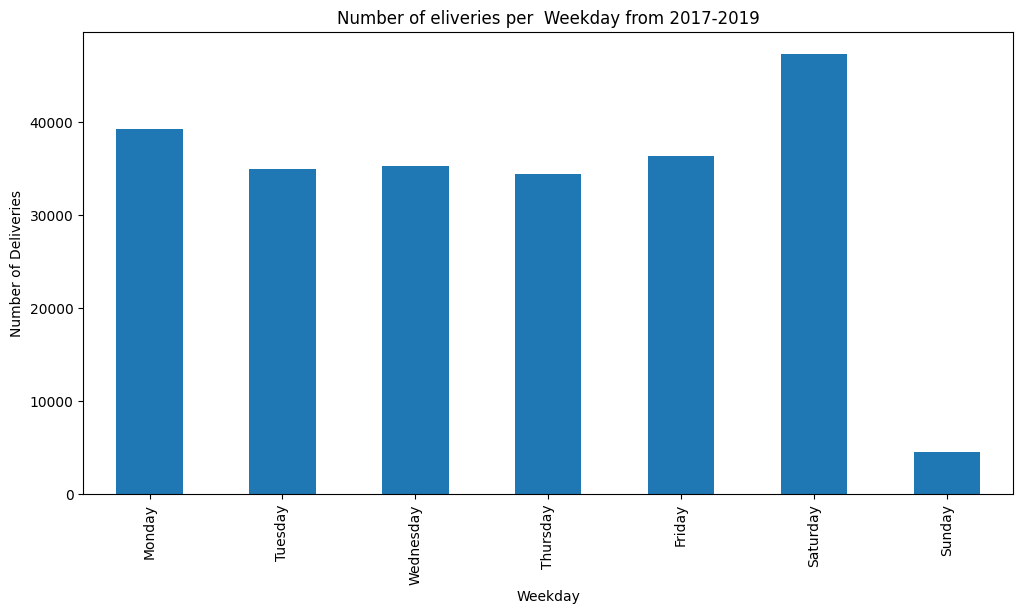

In [52]:
weekday_counts = df['Weekday'].value_counts().sort_index()

# Create a list of weekday names
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create the bar chart
plt.figure(figsize=(12, 6))
weekday_counts.plot(kind='bar')
plt.xticks(range(len(weekdays)), weekdays)
plt.xlabel('Weekday')
plt.ylabel('Number of Deliveries')
plt.title('Number of eliveries per  Weekday from 2017-2019')
plt.show()

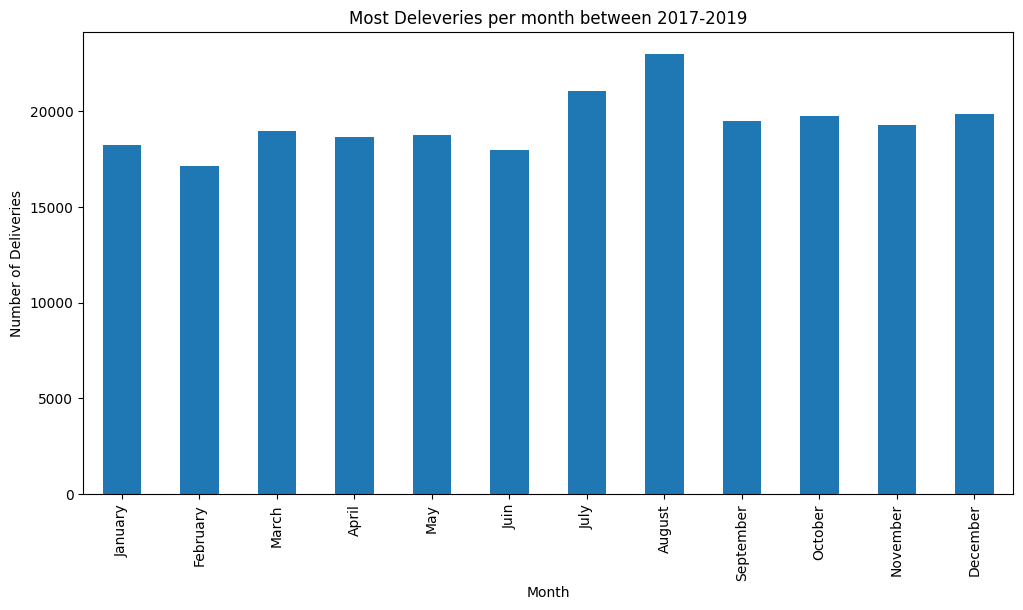

In [55]:
weekday_counts = df['Month'].value_counts().sort_index()

# Create a list of weekday names
months = ['January', 'February', 'March', 'April', 'May', 'Juin', 'July','August','September','October','November','December']

# Create the bar chart
plt.figure(figsize=(12, 6))
weekday_counts.plot(kind='bar')
plt.xticks(range(len(months)), months)
plt.xlabel('Month')
plt.ylabel('Number of Deliveries')
plt.title('Most Deleveries per month between 2017-2019')
plt.show()